<a href="https://colab.research.google.com/github/bosunKwak/BigData/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
# import : library를 불러오는 방법
# torch - lbirary 

print(torch.__version__) # colab에 깔려있는 pytorch version 확인
print(torch.cuda.is_available()) # GPU가 사용할 수 있는지 여부 확인
# CPU로 설정해 놓았기 때문에(런타임 유형 = 'None' 기본설정) False라고 출력됨
# 런타임 유형을 'GPU'환경으로 바꾸면 True로 출력됨
!python --version # python version확인

1.10.0+cu111
False
Python 3.7.12


In [7]:
#download the coffee image
import urllib.request   # url로 data를 처리할 수 있는 모듈

url = 'https://pytorch.tips/coffee' 
fpath = 'coffee.jpg' # 경로 지정
urllib.request.urlretrieve(url,fpath) # urlretrieve 함수: 이미지를 가져와 지정한 경로에 저장

('coffee.jpg', <http.client.HTTPMessage at 0x7f90f91b9fd0>)

다음과 같이 url에서 image를 불러와 지정한 경로에 저장했음을 확인할 수 있음


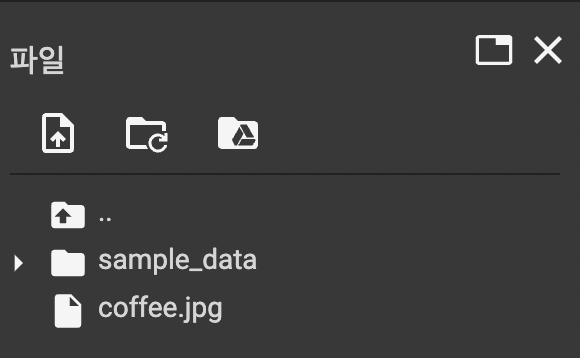

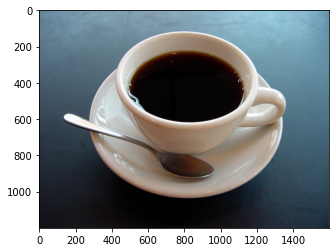

In [8]:
# display the image
import matplotlib.pyplot as plt
# -> matplot library (chart, image를 불러올 때 주로 사용) 안의 pyplot라는 모듈을 plt라는 이름으로 가져옴
from PIL import Image
# -> PIL에서 Image라는 모듈만 가져와 사용
# PIL : image를 열 수 있는 python library. 

img = Image.open('coffee.jpg') # img라는 객체 생성
plt.imshow(img) 

In [9]:
help(urllib.request.urlretrieve)
# 해당 함수에 대한 설명

Help on function urlretrieve in module urllib.request:

urlretrieve(url, filename=None, reporthook=None, data=None)
    Retrieve a URL into a temporary location on disk.
    
    Requires a URL argument. If a filename is passed, it is used as
    the temporary file location. The reporthook argument should be
    a callable that accepts a block number, a read size, and the
    total file size of the URL target. The data argument should be
    valid URL encoded data.
    
    If a filename is passed and the URL points to a local resource,
    the result is a copy from local file to new file.
    
    Returns a tuple containing the path to the newly created
    data file as well as the resulting HTTPMessage object.



\

In [10]:
# preprocess
from torchvision import transforms

transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                                transforms.ToTensor(), transforms.Normalize(
                                    mean = [0.485,0.456,0.406],
                                    std = [0.229, 0.224 ,0.225])])
img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

# output : <class 'torch.Tensor'> torch.Size([3, 224, 224])



<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [14]:
batch = img_tensor.unsqueeze(0) # unsqueeze : 3차원 -> 4차원.. 1 차원을 추가해주는 것  (0 : 가장 앞에 )
print(batch.shape)

# batch: 일정 개수만큼 묶어서 학습시키는 것 (묶어주는 것을 batch라 함)


torch.Size([1, 3, 224, 224])


In [19]:
# Load AlexNex Model using Torchvision
# AlexNex : 유명한 Image classifier
from torchvision import models
model = models.alexnet(pretrained=True)

In [20]:
#Predict
model.eval()
y=model(batch)
print(y.shape)

#Find the winning class
y_max, index = torch.max(y,1)
print(y_max,index)

torch.Size([1, 1000])
tensor([22.8618], grad_fn=<MaxBackward0>) tensor([967])


In [21]:
#Load the file with class names
url = 'https://pytorch.tips/imagenet-labels'

fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url,fpath)

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()] #strip : 불러온 라인의 공백 제거 

print(classes[967])

967: 'espresso',


In [22]:
# Convert the output values to probabilities

prob = torch.nn.functional.softmax(y, dim=1)[0]*100
# 통계 값을 확률로 변환
print(classes[index], prob[index].item())

967: 'espresso', 87.99552154541016


In [24]:
_, indices = torch.sort(y, descending=True)

# 1위~5위
for idx in indices[0][:5]:
  print(classes[idx],prob[idx].item())

967: 'espresso', 87.99552154541016
968: 'cup', 7.688934326171875
504: 'coffee mug', 3.8615663051605225
925: 'consomme', 0.3512957692146301
960: 'chocolate sauce, chocolate syrup', 0.05007766932249069
